In [1]:
# 安装环境
using Pkg
Pkg.activate(@__DIR__)
# Pkg.add("StatsBase")
Pkg.add("VegaLite")
Pkg.instantiate()

using CSV, DataFrames, VegaLite

  Activating project at `~/Code/ucas/论文/雪冰科学数据中心`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed EpollShim_jll ─ v0.0.20230411+0
  No Changes to `~/Code/ucas/论文/雪冰科学数据中心/Project.toml`
    Updating `~/Code/ucas/论文/雪冰科学数据中心/Manifest.toml`
  [2702e6a9] + EpollShim_jll v0.0.20230411+0
  [b27032c2] ↑ LibCURL v0.6.3 ⇒ v0.6.4
  [deac9b47] ↑ LibCURL_jll v7.84.0+0 ⇒ v8.4.0+0
  [29816b5a] ↑ LibSSH2_jll v1.10.2+0 ⇒ v1.11.0+1
  [8e850ede] ↑ nghttp2_jll v1.48.0+0 ⇒ v1.52.0+1
Precompiling project...
  ✓ EpollShim_jll
  1 dependency successfully precompiled in 1 seconds. 167 already precompiled. 2 skipped during auto due to previous errors.


In [2]:
df = CSV.read(joinpath(@__DIR__, "data", "snow_ice_policy_mo.csv"), DataFrame)
first(df, 3)

Row,orgIdentifier,name,repositoryURL,country,institutions,institutionCount,policies,policyCount,entryDate,lastUpdate,contentTypes,contentTypeCount,pidSystems,pidSystemCount,apis,apiCount,dataAccesses,dataAccessCount
,String15,String,String,String7,String,Int64,String?,Int64,Date,Date,String,Int64,String15?,Int64,String31?,Int64,String,Int64
1,r3d100010110,国家冰雪数据中心,https://nsidc.org/data/,美国,环境科学研究所、国家冰雪数据中心（一般；技术）； EarthCube 数据设施委员会（一般）；美国国家航空航天局（基金）；国家海洋和大气管理局（资金；一般）；国家科学基金（基金）；科罗拉多大学博尔德分校（基金；一般）,6,https://www.coretrustseal.org/wp-content/uploads/2020/03/WDC-NSIDC.pdf; https://nsidc.org/privacy.html,2,2012-11-21,2021-06-29,图片;原始数据;科学和统计数据格式；结构化图形；结构化文本,5,DOI,1,FTP; OpenDAP; other,3,开放\n ;\n 受限\n 机构会员资格\n 其他\n 注册,2
2,r3d100010457,剑桥世界冰川学数据中心,https://www.spri.cam.ac.uk/library/catalogue/sprilib/icesnow/,英国,英国皇家学会（基金）；剑桥大学斯科特极地研究所图书馆（一般；技术）；世界冰川学数据中心（一般）,3,https://www.spri.cam.ac.uk/archives/policy/,1,2013-09-09,2021-06-08,视听数据；数据库；图片;标准办公文件,4,missing,1,missing,0,开放\n ;\n 受限\n 注册,2
3,r3d100013754,国家冰川冻土沙漠科学数据中心,http://www.ncdc.ac.cn,中国,中国科学院山地灾害与环境研究所（一般）；中国科学院西北生态环境资源研究院（一般）；中国科学院青海盐湖研究所（一般）；中国科学院新疆生态与地理研究所（一般）,4,missing,0,2022-02-22,2022-02-24,存档数据；图片;纯文本;科学和统计数据格式；源代码;标准办公文件；结构化图形,7,DOI；其他,2,FTP,1,受限\n 其他,1


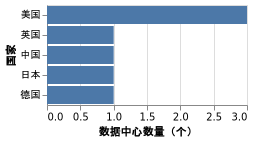

In [3]:
df |> @vlplot(
    :bar,
    # transforr = "datum.year == 2000"}],
    y = {"country", sort = "-x", title = "国家"},
    x = {"count()", title = "数据中心数量（个）"},
)

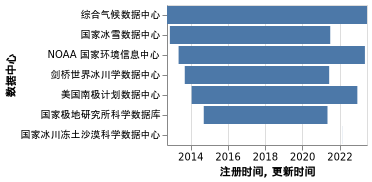

In [4]:
df |> @vlplot(
    :bar,
    # transforr = "datum.year == 2000"}],
    y = {"name:o", sort = "x", title = "数据中心"},
    x = {"entryDate", title = "注册时间"},
    x2 = {"lastUpdate", title = "更新时间"}
)

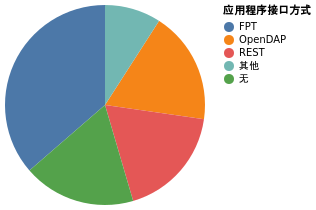

In [5]:
data = DataFrame(
    api=["FPT", "OpenDAP", "REST", "其他", "无"],
    count=[4, 2, 2, 1, 2]
)

data |> @vlplot(:arc,
    theta = {:count, stack = true},
    color = {:api, title = "应用程序接口方式"},
    order = :count,
    color="category:n"
    view = {stroke = nothing}
)

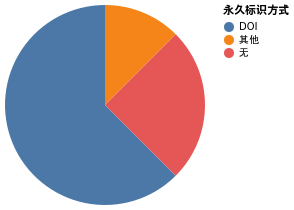

In [6]:

data = DataFrame(
    pidSystem=["DOI", "其他", "无"],
    count=[5, 1, 2]
)

data |> @vlplot(:arc,
    theta = :count,
    color = {:pidSystem, title = "永久标识方式"},
    order = :count,
    view = {stroke = nothing}
)
